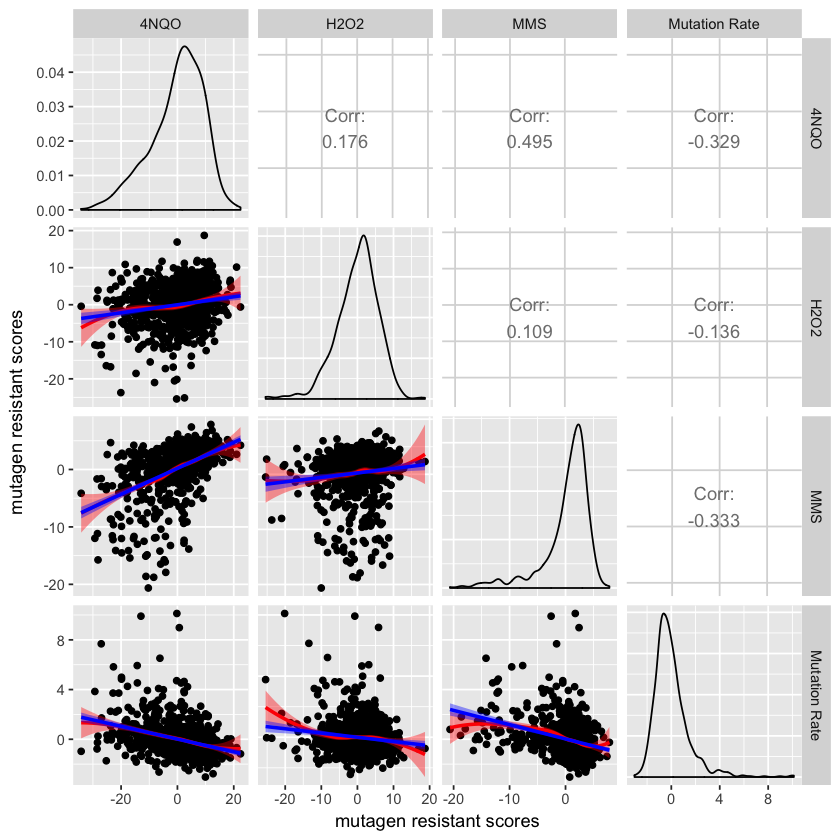

In [16]:
require(GGally)
library(ggplot2)

load(file='~/Dropbox/MutationRate/20170606parent/mutagen.heri.Rdata')
load(file='~/Dropbox/MutationRate/20170606parent/seg.heri.Rdata')
load("/Users/connie/Dropbox/MutationRate/20160909mutagen_resistance/LG_mutagens/genotypes/1000BYxRM_with_names.RData")

names=intersect(mutagen.heri$strain,seg.heri$strain)
mutagen.heri.intersect=mutagen.heri[which(mutagen.heri$strain %in% names),]
seg.heri.intersect=seg.heri[which(seg.heri$strain %in% names),]

muta.mr=merge(mutagen.heri.intersect,seg.heri.intersect)
colnames(muta.mr)=c("strain","4NQO","4NQO_conc2","Caffeine_conc1","Caffeine_conc2",
                    "H2O2","H2O2_conc2","MMS","MMS_conc2","Mutation Rate","batch")

my_fn <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) + 
    geom_point() + 
    geom_smooth(method=loess, fill="red", color="red", ...) +
    geom_smooth(method=lm, fill="blue", color="blue", ...)
  p
}

ggpairs(data=muta.mr,
        columns = c(2,6,8,10),
        lower = list(continuous = my_fn),
        xlab = "mutagen resistant scores",  
        ylab = "mutagen resistant scores")


